# Compare predictions

In this notebook we want to compare predictions of different models. Since the type of predictions are different, first we convert them to survival functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# to use latex within matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
test = pd.read_csv('../../data/main_process_preprocessed_data_test.csv')
test.index = test.id


predictions_drsa = pd.read_csv('../../data/full_predictions_drsa.csv')
predictions_deephit = pd.read_csv('../../data/full_predictions_deephit.csv')
predictions_cox = pd.read_csv('../../data/full_predictions_cox.csv')

year_max_drsa = 30
year_max_deephit = 10
year_max_cox = 7

In [3]:
predictions_drsa.shape

(1362, 366)

## Convert predictions to survivorship

We want to compute the survival function $S(t) = P(T>t) = 1 - P(T \leq t)$, being $T$ the survival time. 

Since in **DRSA** we have a discrete time and predictions for $h(t) = P(T=t|T>t-1)$  and since

$P(T > t) = P(T \neq 0,..., T \neq t) = \prod_{k\leq t} P(T \neq k| T > k-1) = \prod_{k\leq t} (1 - P(T = k| T > k-1))$

we have that $S(t) = \prod_{k\leq t} (1 - h(k))$.

In [4]:
predictions_drsa.index = predictions_drsa.id
predictions_drsa = predictions_drsa.drop(columns = 'id')
# convert to survivorship
surv_drsa = (1-predictions_drsa).cumprod(axis = 1)

surv_drsa.head()

0         1         2         3         4         5  \
id                                                                     
10013995  0.972523  0.960308  0.949909  0.938523  0.925509  0.911055   
10026243  0.977798  0.971893  0.967848  0.963890  0.959666  0.955122   
10039319  0.979651  0.973266  0.968599  0.963968  0.959033  0.953765   
10043504  0.972241  0.962352  0.954918  0.947373  0.939154  0.930279   
10044738  0.989606  0.986275  0.983608  0.980904  0.978090  0.975164   

                 6         7         8         9  ...           355  \
id                                                ...                 
10013995  0.895585  0.879520  0.863194  0.846849  ...  6.191137e-23   
10026243  0.950306  0.945291  0.940138  0.934890  ...  2.044976e-12   
10039319  0.948226  0.942486  0.936599  0.930602  ...  4.601753e-13   
10043504  0.920921  0.911248  0.901393  0.891458  ...  4.843856e-19   
10044738  0.972126  0.968979  0.965731  0.962391  ...  1.167552e-11   

                   356           357           358           359  \
id                                                                 
10013995  4.974342e-23  3.996358e-23  3.210382e-23  2.578773e-23   
10026243  1.777048e-12  1.543960e-12  1.341218e-12  1.164902e-12   
10039319  3.998568e-13  3.474011e-13  3.017892e-13  2.621335e-13   
10043504  3.960145e-19  3.237261e-19  2.646009e-19  2.162482e-19   
10044738  1.011123e-11  8.755114e-12  7.579670e-12  6.561001e-12   

                   360           361           362           363           364  
id                                                                              
10013995  2.071256e-23  1.663486e-23  1.335885e-23  1.072715e-23  8.613202e-24  
10026243  1.011597e-12  8.783218e-13  7.624807e-13  6.618104e-13  5.743393e-13  
10039319  2.276606e-13  1.976972e-13  1.716565e-13  1.490281e-13  1.293672e-13  
10043504  1.767101e-19  1.443839e-19  1.179572e-19  9.635616e-20  7.870163e-20  
10044738  5.678346e-12  4.913671e-12  4.251317e-12  3.677685e-12  3.180972e-12  

[5 rows x 365 columns]

Instead, in **DEEPHIT** we have predictions for $f(t) = P(T=t)$. Then we can easily find

$S(t) = P(T >t) = 1 - P(T \leq t) =  1 - \sum_{k\leq t} P(T = k) = 1 - \sum_{k\leq t} f(k)$

In [5]:
predictions_deephit.index = predictions_drsa.index
surv_deephit = 1- predictions_deephit.cumsum(axis = 1)
surv_deephit.head()

0         1         2         3         4         5  \
id                                                                     
10013995  0.983587  0.968989  0.950905  0.932714  0.917829  0.899328   
10026243  0.993977  0.987422  0.977602  0.970277  0.959865  0.950992   
10039319  0.993285  0.987006  0.978084  0.970286  0.960447  0.952105   
10043504  0.990916  0.982593  0.971458  0.961153  0.950000  0.938939   
10044738  0.995627  0.991055  0.983734  0.978275  0.969584  0.963506   

                 6         7         8         9  ...        50        51  \
id                                                ...                       
10013995  0.881547  0.866519  0.850342  0.831773  ...  0.153142  0.136107   
10026243  0.939714  0.929318  0.919400  0.909685  ...  0.233661  0.207745   
10039319  0.941616  0.931679  0.922747  0.913126  ...  0.233494  0.207494   
10043504  0.926578  0.915409  0.904552  0.892313  ...  0.210144  0.186947   
10044738  0.954490  0.945624  0.938193  0.931104  ...  0.258206  0.229473   

                52        53        54        55        56        57  \
id                                                                     
10013995  0.119163  0.101617  0.084869  0.067774  0.050336  0.033565   
10026243  0.181127  0.153687  0.128596  0.102809  0.076360  0.051582   
10039319  0.180945  0.153143  0.127888  0.102052  0.075384  0.051070   
10043504  0.163149  0.138385  0.115584  0.092334  0.068372  0.046178   
10044738  0.200252  0.169671  0.141808  0.113116  0.083661  0.056728   

                58            59  
id                                
10013995  0.016829 -2.400000e-08  
10026243  0.026004  5.820000e-08  
10039319  0.025463 -3.400000e-09  
10043504  0.023173 -5.600000e-09  
10044738  0.028345 -4.220000e-08  

[5 rows x 60 columns]

For the **COX** model we already built survivorship predictions (but on a much more refined time grid).

In [6]:
predictions_cox = predictions_cox.transpose()
predictions_cox.index = predictions_drsa.index

surv_cox = predictions_cox
surv_cox.head()

0         1         2         3         4         5     \
id                                                                     
10013995  0.999335  0.999335  0.999335  0.999335  0.999335  0.999002   
10026243  0.999868  0.999868  0.999868  0.999868  0.999868  0.999802   
10039319  0.999873  0.999873  0.999873  0.999873  0.999873  0.999809   
10043504  0.999650  0.999650  0.999650  0.999650  0.999650  0.999475   
10044738  0.999953  0.999953  0.999953  0.999953  0.999953  0.999930   

              6         7         8         9     ...      1578      1579  \
id                                                ...                       
10013995  0.998335  0.998335  0.998002  0.997335  ...  0.482842  0.482842   
10026243  0.999670  0.999670  0.999604  0.999471  ...  0.865648  0.865648   
10039319  0.999681  0.999681  0.999617  0.999489  ...  0.869781  0.869781   
10043504  0.999124  0.999124  0.998949  0.998598  ...  0.681964  0.681964   
10044738  0.999883  0.999883  0.999860  0.999813  ...  0.950312  0.950312   

              1580      1581      1582      1583      1584      1585  \
id                                                                     
10013995  0.482842  0.482842  0.482842  0.482842  0.482842  0.482842   
10026243  0.865648  0.865648  0.865648  0.865648  0.865648  0.865648   
10039319  0.869781  0.869781  0.869781  0.869781  0.869781  0.869781   
10043504  0.681964  0.681964  0.681964  0.681964  0.681964  0.681964   
10044738  0.950312  0.950312  0.950312  0.950312  0.950312  0.950312   

              1586      1587  
id                            
10013995  0.482842  0.482842  
10026243  0.865648  0.865648  
10039319  0.869781  0.869781  
10043504  0.681964  0.681964  
10044738  0.950312  0.950312  

[5 rows x 1588 columns]

# Plot sample of patients

In [7]:
# set time for plots
time_threshold = 5
drsa_time = np.arange(1,len(predictions_drsa.columns)+1)/len(predictions_drsa.columns)*year_max_drsa
deephit_time = np.arange(1,len(predictions_deephit.columns)+1)/len(predictions_deephit.columns)*year_max_deephit
cox_time = predictions_cox.columns/len(predictions_cox.columns)*year_max_cox

sample_ids = np.random.choice(test.id, size = 500, replace = False)


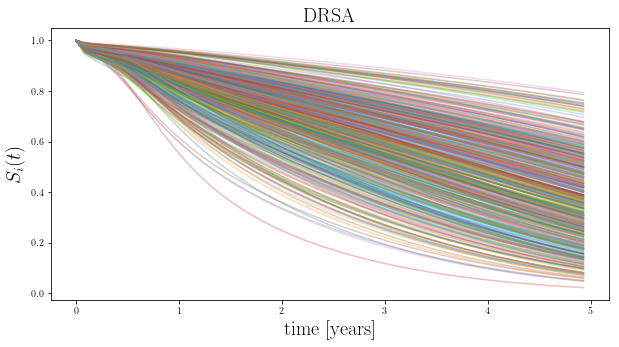

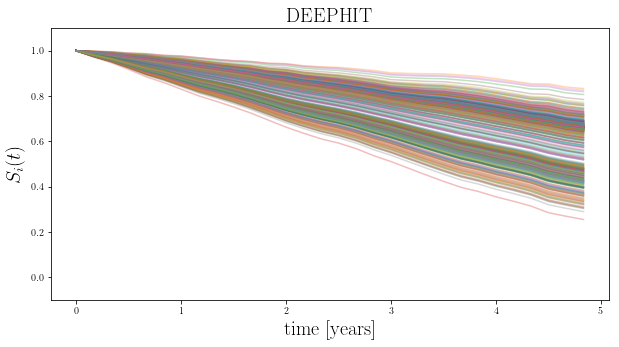

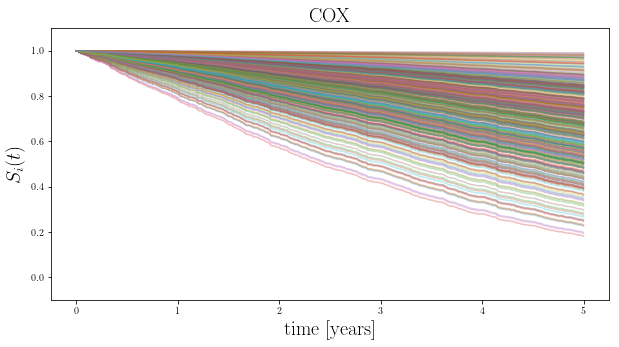

In [8]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]),alpha = 0.3)
plt.xlabel('time [years]', size = 20)
plt.title('DRSA',size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]),alpha = 0.3)
plt.xlabel('time [years]', size = 20)
plt.title('DEEPHIT',size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.ylim(-0.1,1.1)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold],alpha = 0.3)
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.ylim(-0.1,1.1)
plt.show()

Let's compare the original predictions on the same sample

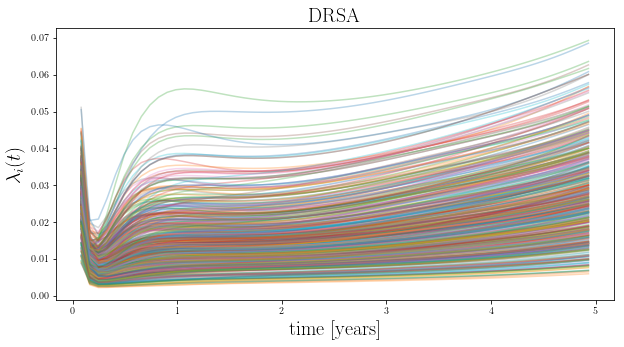

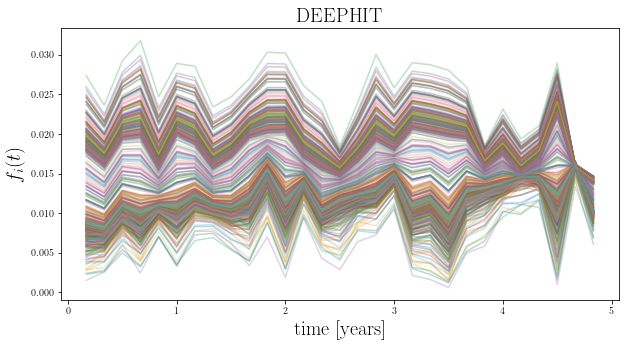

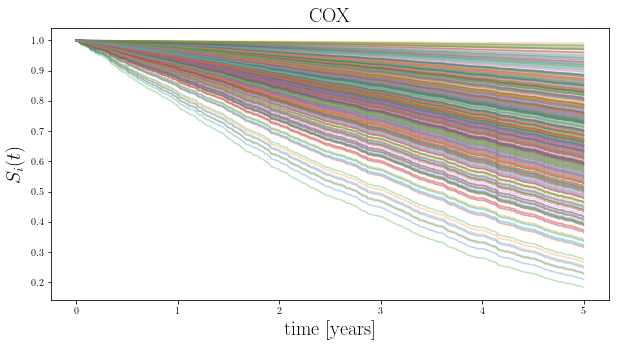

In [9]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(drsa_time[drsa_time < time_threshold],predictions_drsa.loc[i,:][drsa_time < time_threshold],alpha = 0.3)
plt.ylabel(r'$\lambda_i(t)$', size = 20)
plt.xlabel('time [years]', size = 20)
plt.title('DRSA',size = 20)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(deephit_time[deephit_time < time_threshold],predictions_deephit.loc[i,:][deephit_time < time_threshold],alpha = 0.3)
plt.ylabel(r'$f_i(t)$', size = 20)
plt.xlabel('time [years]', size = 20)
plt.title('DEEPHIT',size = 20)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold],alpha = 0.3)
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.show()

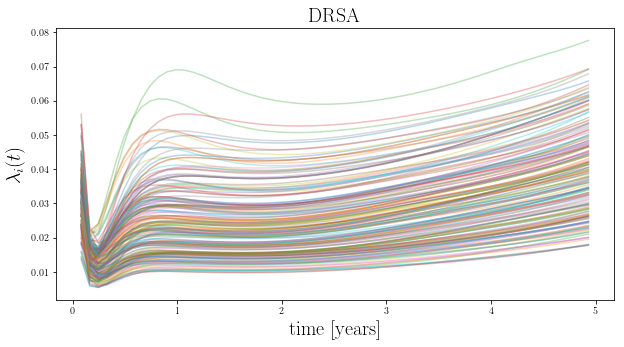

In [29]:
# let's seect patients whose hazard is greater at  2 years than at 1 year
sample_ids2 = list(predictions_drsa[(predictions_drsa['11']>predictions_drsa['23']) & (predictions_drsa['11']> 0.01)].index)

plt.figure(figsize = (10,5))
for i in sample_ids2:
    plt.plot(drsa_time[drsa_time < time_threshold],predictions_drsa.loc[i,:][drsa_time < time_threshold],alpha = 0.3)
plt.ylabel(r'$\lambda_i(t)$', size = 20)
plt.xlabel('time [years]', size = 20)
plt.title('DRSA',size = 20)
plt.show()

In [50]:
pd.DataFrame({'all':test.mean(),'selected':test[test.id.isin(sample_ids2)].mean(),'diff':test[test.id.isin(sample_ids2)].mean()-test.mean()})

all      selected          diff
id                   1.599655e+07  1.601661e+07  20053.791193
age_in               7.375037e+01  7.889011e+01      5.139743
time_event           1.143209e+03  1.000516e+03   -142.692768
status               2.540382e-01  3.736264e-01      0.119588
ACE_PC1              7.268038e-01 -1.891603e+01    -19.642837
ACE_PC2             -1.427917e-01 -1.696035e+00     -1.553244
aldosteronics_PC1   -7.622404e-02 -5.714925e+00     -5.638701
aldosteronics_PC2    4.549841e-02 -4.413463e-01     -0.486845
beta_PC1             5.958752e-01 -1.441481e+01    -15.010688
beta_PC2            -2.326546e-03 -2.080692e+00     -2.078365
hospitalisation_PC1  9.412324e-03  4.880328e+00      4.870916
hospitalisation_PC2  2.743943e-02 -9.116919e-01     -0.939131

In [29]:
# check survival times of patients with extremely high surv prob in cox after 5 years (1135)
sample_ids3 = list(surv_cox[surv_cox.loc[:,1135] > 0.85].index)

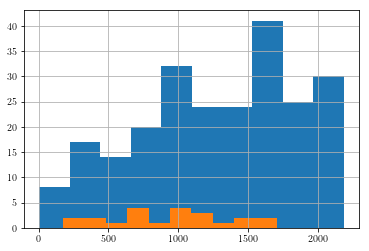

In [32]:
test[test.id.isin(sample_ids3)].time_event.hist()
test[test.id.isin(sample_ids3) & test.status == 1].time_event.hist()

In [36]:
len(test[(test.id.isin(sample_ids3)) & (test.time_event < 365*5)])/len(test[test.id.isin(sample_ids3)])

0.7872340425531915

In [30]:
test[test.id.isin(sample_ids3)].status.value_counts()

0    213
1     22
Name: status, dtype: int64

In [18]:
pd.DataFrame({'all':test.mean(),'selected':test[test.id.isin(sample_ids3)].mean(),'diff':test[test.id.isin(sample_ids3)].mean()-test.mean()})

all      selected           diff
id                   1.599655e+07  1.614647e+07  149920.730191
age_in               7.375037e+01  4.851181e+01     -25.238556
time_event           1.143209e+03  1.307685e+03     164.475788
status               2.540382e-01  7.086614e-02      -0.183172
ACE_PC1              7.268038e-01  1.915925e+01      18.432441
ACE_PC2             -1.427917e-01 -3.287686e-02       0.109915
aldosteronics_PC1   -7.622404e-02 -3.002848e+00      -2.926624
aldosteronics_PC2    4.549841e-02  7.109139e-01       0.665415
beta_PC1             5.958752e-01  2.873544e+01      28.139560
beta_PC2            -2.326546e-03  5.104142e-01       0.512741
hospitalisation_PC1  9.412324e-03  1.587984e+00       1.578572
hospitalisation_PC2  2.743943e-02  4.989691e-01       0.471530

# Males vs Females

In [10]:
colors = ['fuchsia','dodgerblue']
col = {'F':colors[0],'M':colors[1]}

# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Females', 'Males']

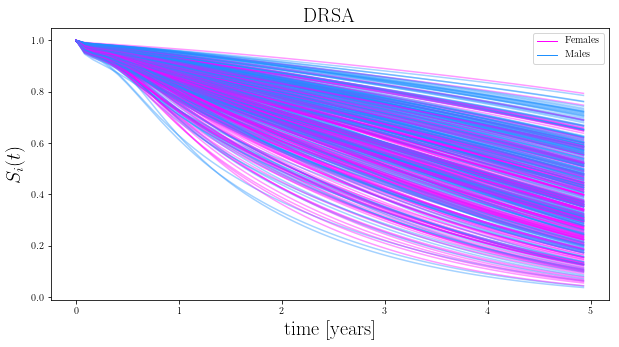

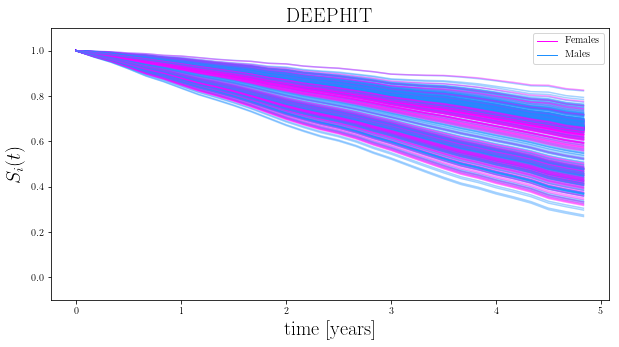

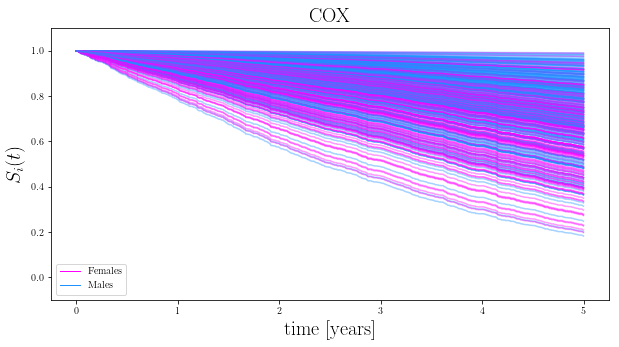

In [11]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col[test.loc[i,'sex']],
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.title('DRSA',size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col[test.loc[i,'sex']],
             alpha = 0.4,
            )
plt.ylabel(r'$S_i(t)$', size = 20)
plt.xlabel('time [years]', size = 20)
plt.title('DEEPHIT',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col[test.loc[i,'sex']],
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# Age

In [12]:
def col(x):
    return 'blue' if x <75 else 'red'

colors = ['blue','red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Under 75', 'Over 75']

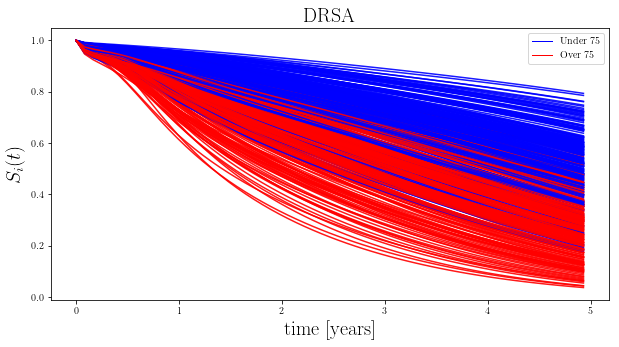

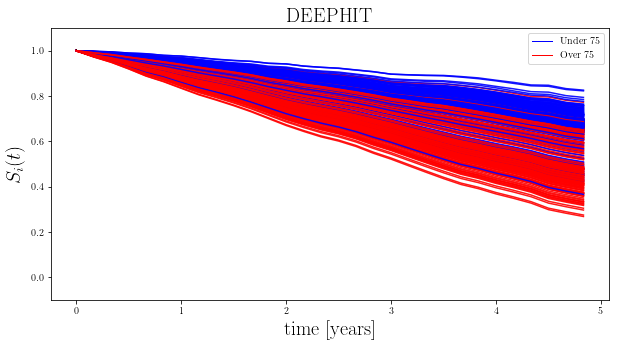

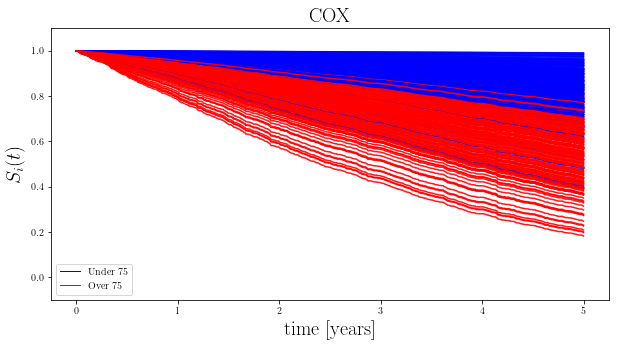

In [13]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,'age_in']),
             alpha = 0.9,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DRSA',size = 20)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,'age_in']),
             alpha = 0.9,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DEEPHIT',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,'age_in']),
             alpha = 0.9,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# More cases

In [14]:
def col(x):
    if x['sex'] == 'F' and x['age_in'] > 75:
        return 'fuchsia'
    elif x['sex'] == 'F' and x['age_in'] < 75:
        return 'red'
    elif x['sex'] == 'M' and x['age_in'] > 75:
        return 'blue'
    else:
        return 'aqua'

colors = ['fuchsia','red','blue','aqua']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Female Over 75', 'Female Under 75', 'Male Over 75', 'Male Under 75']

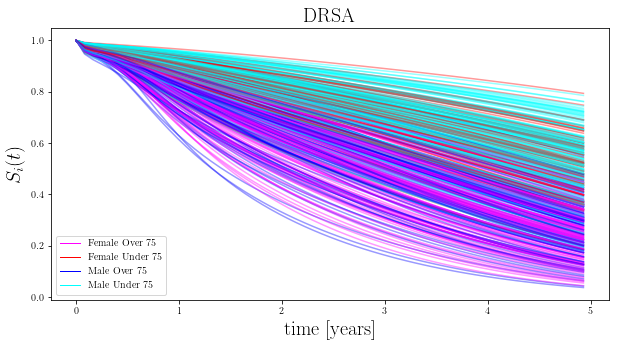

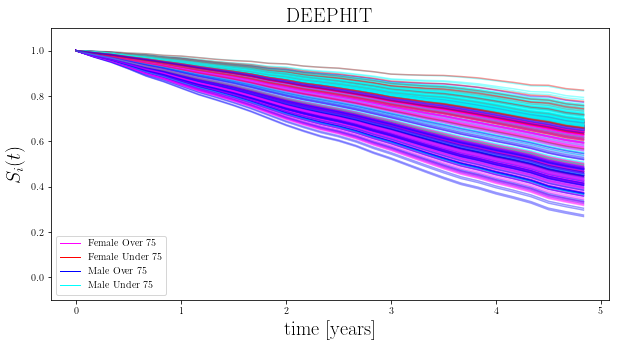

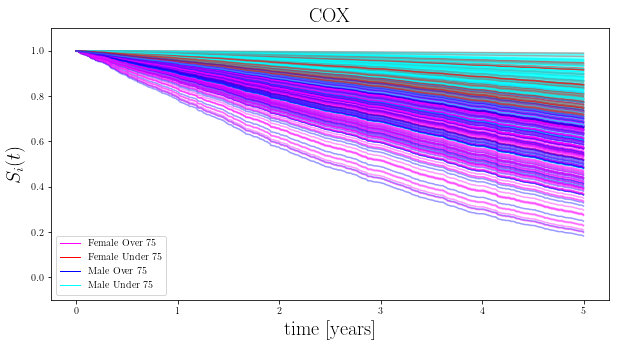

In [15]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DRSA',size = 20)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DEEPHIT',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [16]:
def col(x):
    return 'red' if x['sex'] == 'F' and x['age_in'] > 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Female Over 75']

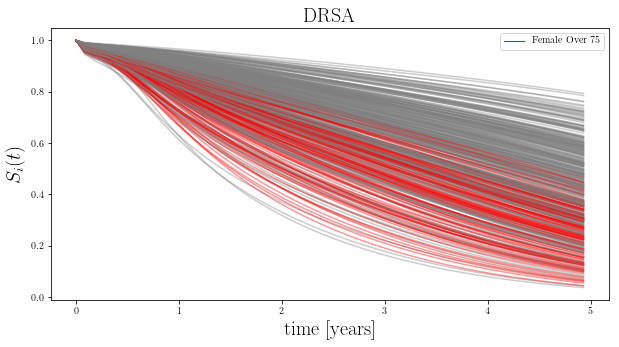

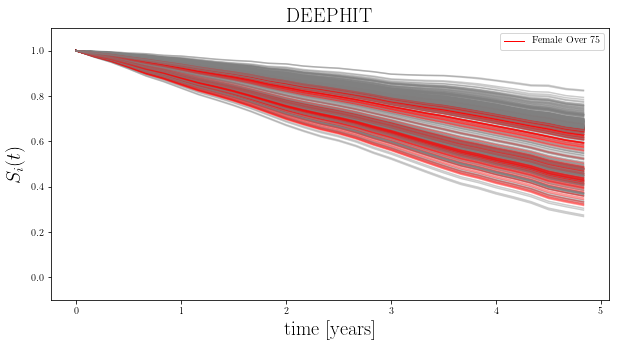

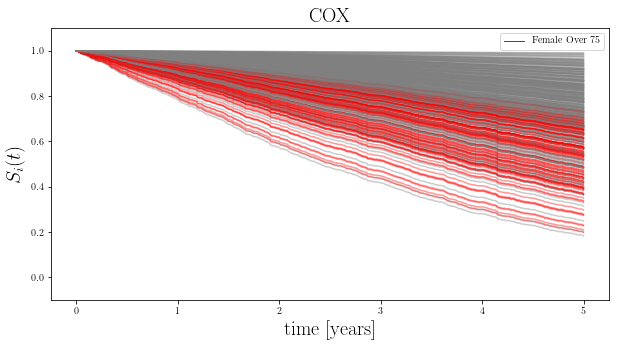

In [17]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DRSA',size = 20)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DEEPHIT',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [18]:
def col(x):
    return 'red' if x['sex'] == 'F' and x['age_in'] <= 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Female Under 75']

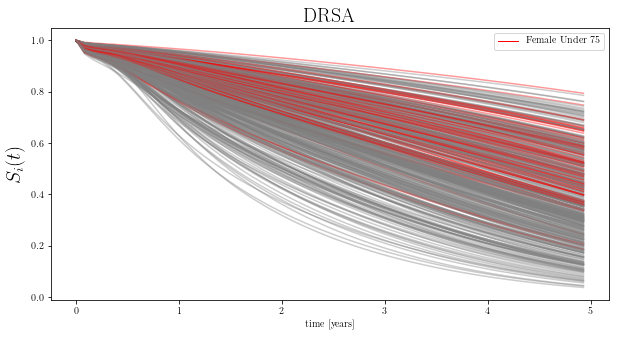

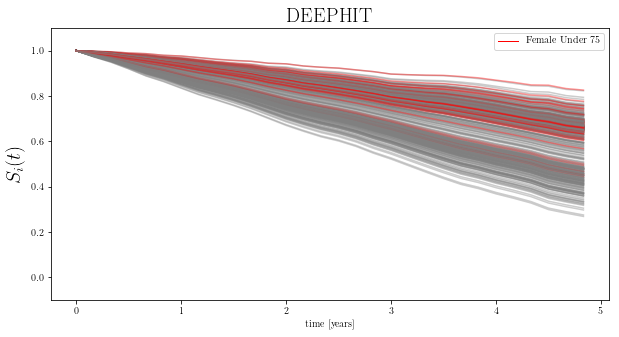

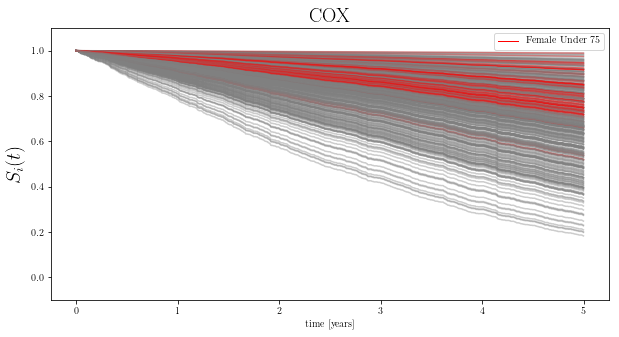

In [19]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DRSA',size = 20)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DEEPHIT',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [20]:
def col(x):
    return 'red' if x['sex'] == 'M' and x['age_in'] > 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Male Over 75']

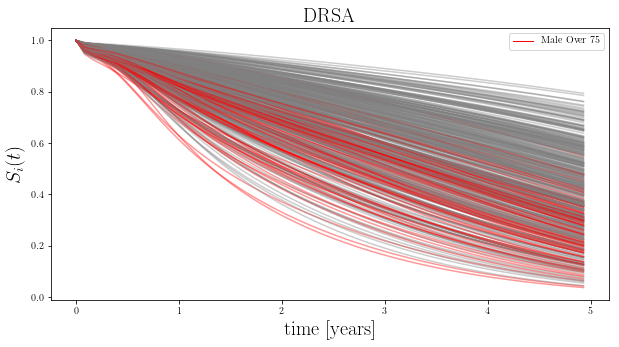

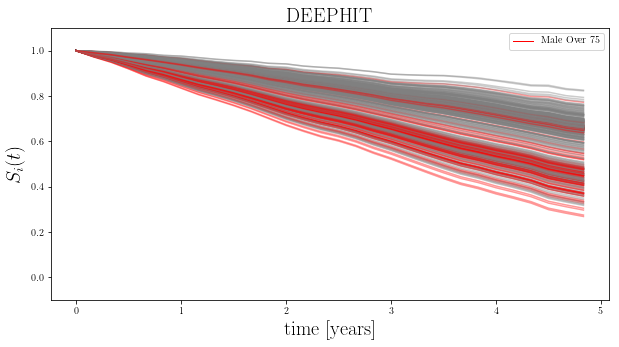

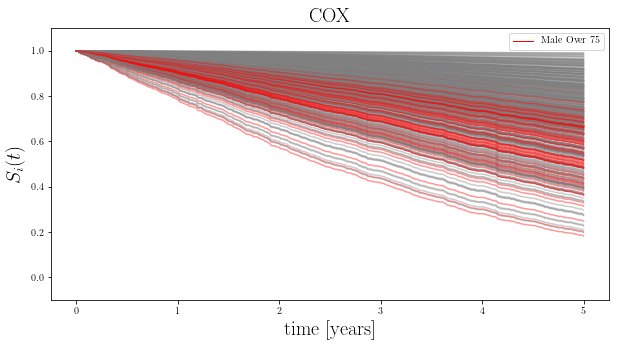

In [21]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DRSA',size = 20)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DEEPHIT',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [22]:
def col(x):
    return 'red' if x['sex'] == 'M' and x['age_in'] <= 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Male Under 75']

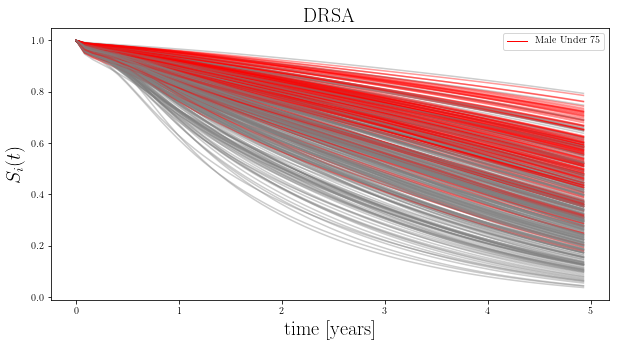

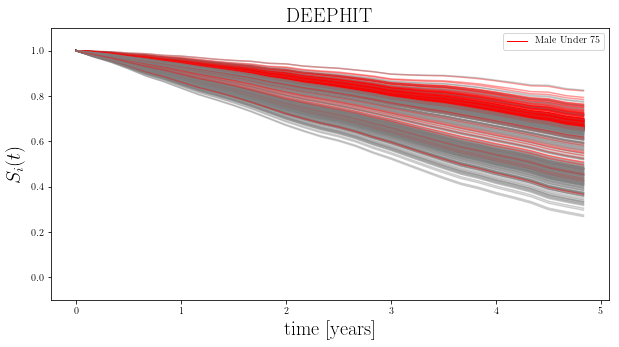

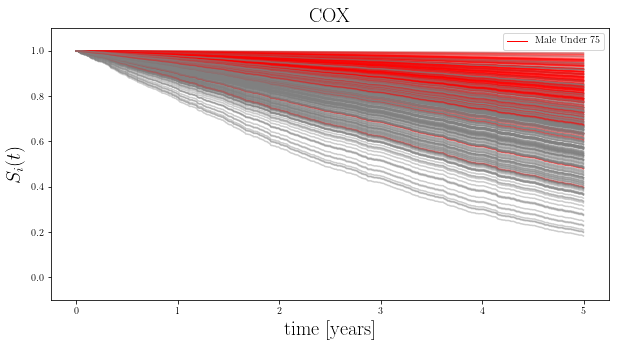

In [23]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DRSA',size = 20)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DEEPHIT',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [13]:
def col(x):
    return 'red' if x['ACE_PC1'] > 0 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Positive ACE\_PC1']

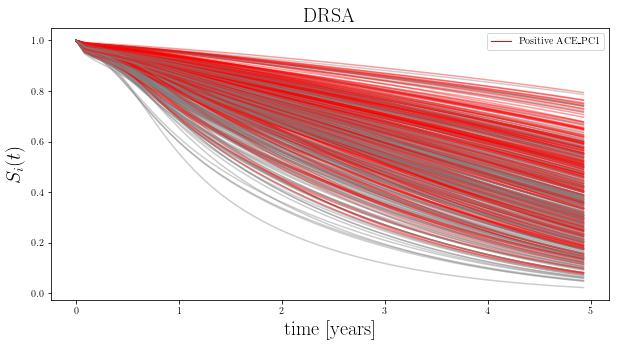

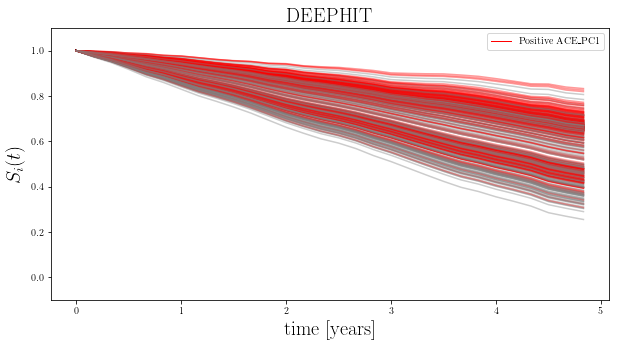

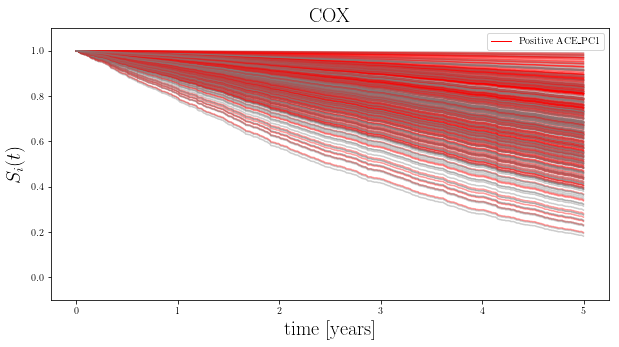

In [14]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DRSA',size = 20)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('DEEPHIT',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]', size = 20)
plt.ylabel(r'$S_i(t)$', size = 20)
plt.title('COX',size = 20)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()